# One class SVM and NN

In [1]:
from occ.occ import *

file = "../od_data/satimage.mat"

oc_nn = occ()
oc_nn.load_data_mat(file)
print(oc_nn.X.shape)
oc_nn.train(model='deepsvdd', epochs=100, norm=True)
Y_scores = oc_nn.get_score(norm=True)
Y_hat = oc_nn.predict(norm=True)

#ocsvm = occ()
#ocsvm.load_data_mat(file)
#ocsvm.train(model='ocsvm', kernel='rbf', norm=True) # If norm=True, data will be normalized(L2)
#Y_scores = ocsvm.get_score(norm=True)
#Y_hat = ocsvm.predict(norm=True)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
(5803, 36)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2048      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4096      
_________________________________________________________________
kernel_output (Dense)        (None, 64)                4096      
_________________________________________________________________
hypersphere_distance (Hypers (None,)                   1         
___________________________________

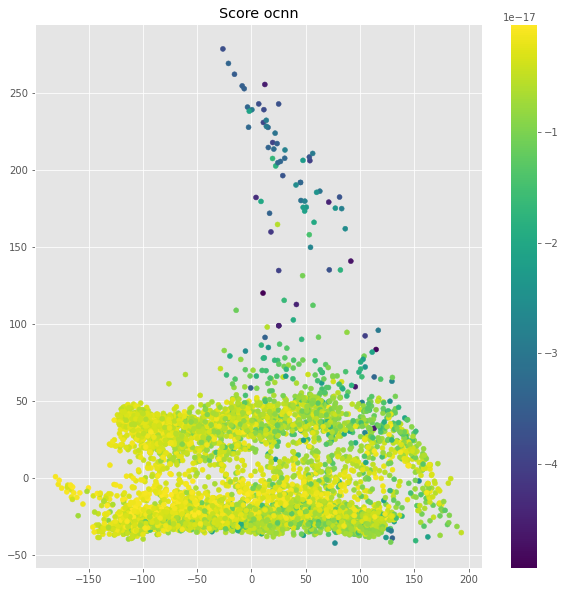

In [2]:
occ.show_projection(oc_nn.X, Y_scores, title="Score ocnn", markersize=100)
#occ.show_projection(oc_nn.X, Y_hat, title="Prediction ocnn", markersize=100)

#occ.show_projection(ocsvm.X, Y_scores, title="Score ocsvm with rbf kernel", markersize=100)
#occ.show_projection(ocsvm.X, Y_hat, title="Prediction ocsvm with rbf kernel", markersize=100)

#occ.show_projection(ocsvm.X, ocsvm.Y, title="Real", markersize=100, cmap='viridis_r')

In [14]:
oc_nn.model.kernel.layers[5].get_weights()
#oc_nn.model.kernel.layers[1].get_weights()
r = oc_nn.model.radius**2

In [36]:
s = oc_nn.get_score(norm=True)
np.where(-s < r, 1, -1)

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [5]:
ocsvm.export_outliers("outliers.csv", Y_hat) ## Raw data of outliers
ocsvm.export_csv("scores.csv", Y_scores) ## Raw data with scores
ocsvm.export_csv("predictions.csv", Y_hat) ## Raw data with predictions